# Creating deep features dataset

## Importing libraries

In [13]:
from keras.models import load_model
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from PIL import Image
from matplotlib import pyplot
import numpy as np
import cv2
import sys
import glob
import csv

sys.path.append("../lib/")
from inception_resnet_v1 import *

import tensorflow as tf   
tf.get_logger().setLevel('ERROR')

## Load model

In [14]:
model = load_model("../models/keras/model/facenet_keras.h5", custom_objects={"tf": tf})

#print model input and output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_3:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_3/Identity:0' shape=(None, 512) dtype=float32>]


## Face embeddings generator

In [47]:

def get_face(image_path):
     # ==== load cascade =====
    face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pixels = np.asarray(img)
    
    # ==== detect face ======
    face2 = face_cascade.detectMultiScale(img, 1.1, 4)
#     face2 = face2[0]
#     print(face2[0])
    x1, y1, width, height = face2[0]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1+height
    face2 = pixels[y1:y2, x1:x2]
    image2 = Image.fromarray(face2)
    
    # ==== resize face ======
    image2 = image2.resize((160, 160))
    face_array2 = np.asarray(image2)
    
    # ==== plot image =====
    pyplot.imshow(image2)
    return face_array2


def get_face_embeddings(image_path):
    face_array2 = get_face(image_path)
    # Obtain embeddings
    face_pixels = face_array2.astype('float32')

    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    pred = model.predict(samples)
    return pred
#     print(pred)
#     print(pred[0].shape)
#     return 

## Creating csv file

IndexError: tuple index out of range

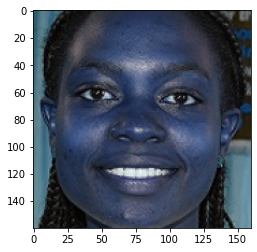

In [48]:
# loading image folders
folders = glob.glob('../data/new-data/*')
# columns = ["fe"+str(i+1) for i in range(128)]
# case = 0

# creating csv file
with open('../data/new-data1.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['name', 'embeddings'])
    #looping through folder
    for i, folder in enumerate(folders):
        #storing files array in a variable
        files = glob.glob(folder + '/*')
        #looping through files
        for file in files:
            #getting face embeddings
            embeddings = get_face_embeddings(file)
            writer.writerow([folder.split('\\')[-1], embeddings])
#             image = face_recognition.load_image_file(file)
#             # determining face location
#             face_location = face_recognition.face_locations(image, number_of_times_to_upsample=2)
#             # determing face encodings
#             if face_location:
#                 known_face_encoding = face_recognition.face_encodings(image, known_face_locations=face_location)[0]
#                 case += 1
#                 # writes to the csv file
